#Постановка задачи

- Предприятие выпускает высокопроницаемую трансформаторную сталь (ВПС)
- Основной показатель качества ВПС – низкие удельные магнитные потери
- ВПС считается качественной при удельных магнитных потерях < 1.1 Вт/кг


Цель работы: определить возможные направления улучшения технологического процесса для увеличения процента выхода продукции с низкими удельными магнитными потерями

Задачи:

•	Определить проблемы с данными по параметрам технологического процесса (70%)

•	Определить наиболее важные этапы и параметры технологического процесса, влияющие на качество продукции (30%)


#Анализ данных

##Импорт  и обработка данных

In [1]:
import os
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np

In [3]:
data = pd.read_excel('/content/drive/My Drive/Datasets/steel/Dataset.xlsx', sheet_name='Исходные данные')
data.head()

,Индекс,Номер партии,Номер партии_АСУТП,Номер плавки,Номер рулона,Длина_1,Длина_2,Длина_3,Длина_4,Длина_5,Углерод_начало,Длина_Обезуглероживание,Толщина_средняя,Длина_ГП,Длина_МС,Длина_Н,Азот_конец,Азот_начало,Азот_среднее,Кислород_начало,N,Al,Номер_бригады,Поступление_в_технологическую_секцию,Выезд_из_технологической_секции,Длина__м,ЗВО,CO_Этап2_зона1,CO_Этап2_зона2,CO_Этап2_зона3,CO_Этап2_зона4,CO2_Этап1,Калиброванное_значение_CO2_Этап2_зона4,Si,Mn,Cu,NH3_Этап3_зона3,T_Этап3_зона4,Настройка_датчика_CO2_Этап2_зона4,Ni,...,T_Этап3_зона3,T_в_начале_нормализации,T_в_середине_нормализации_1,T_в_середине_нормализации_2,T_в_конце_нормализации,T_проход_1,T_проход_3,T_проход_5,T_проход_2,T_проход_4,Температура_полосы_на_выходе_реверсивного стана,ШОС,Ti,Длина_Азотирование,Толщина_МС,Точка_росы_Этап4_зона1,Точка_росы_Этап2_зона2,Точка_росы_Этап2_зона3,T_за_средней_клетью,T_конца_проката,T_рулона,Тренд_температуры_перед_реверсивным_станом,Толщина_перед_смоткой,C,Удельные_потери,Начало непрерывного отжига,Окончание непрерывного отжига,F,Cr,Водород_начало,Водород_среднее,CO2_Этап2_зона5,H2_Этап2_зона5,Точка_росы_Этап1_зона1,Точка_росы_Этап1_зона2,CO_Этап1_зона1,CO_Этап1_зона2,H2_Этап1,CO2_Этап2_зона1,CO2_Этап2_зона3
0,0,522350,580797,1717428,70,23.28,2214.0,55.600000,5111.880000,121.760000,0.0027,121.120000,25,46.32,120,25.2,0.023,0.022,0.0225,0.091,0.0083,0.028,1,2017-08-01 13:23:14,NaT,0.016000,3.5,1.73,1.15,0.46,0.21,0.11,-0.020000,3.315,0.14,0.01,0.150116,309,0.000000,0.01,...,771.61576,1097.4032,1098.0032,1091.0952,902.1128,135.691170,181.605608,199.750038,178.91038,191.527300,100,Melubir 6736/LI,0.002,3560,0.287,-19.860000,61.004480,59.753280,948.368,922.787048,593.184381,364,"тренд 2,3",0.055,1.072,NaT,2017-08-01 14:07:58,0.024,0.11,2.4,1.7,1.22,69.7,NaN,63.680000,NaN,1.6,69.75,0.1,0.06
1,1,522350,580797,1717428,70,25.22,2211.0,60.233333,5104.953333,131.906667,0.0027,131.213333,25,47.68,130,27.3,0.023,0.022,0.0225,0.091,0.0083,0.028,1,2017-08-01 13:23:14,2017-08-01 14:07:58,0.017333,3.5,1.73,1.15,0.46,0.21,0.11,0.821471,3.315,0.14,0.01,0.756901,25,0.841471,0.01,...,771.83092,1097.4368,1098.0368,1091.0448,902.2472,136.562104,183.547782,200.214333,179.18122,193.175100,100,Melubir 6736/LI,0.002,3680,0.288,-19.860000,61.035147,59.690293,948.232,922.812952,591.215619,364,"тренд 2,3",0.055,1.087,NaT,NaT,0.024,0.11,2.7,1.9,1.22,70.8,NaN,63.680000,NaN,1.6,69.75,0.1,0.06
2,2,522350,580797,1717428,70,27.16,2208.0,64.866667,5098.026667,142.053333,0.0027,141.306667,25,49.04,140,29.4,0.023,0.022,0.0225,0.091,0.0083,0.028,1,2017-08-01 13:23:14,2017-08-01 14:07:58,0.018667,3.5,1.73,1.15,0.46,0.21,0.11,0.889297,3.315,0.14,0.01,0.149549,290,0.909297,0.01,...,771.91392,1097.4704,1098.0704,1090.9944,902.3816,135.844343,183.523596,203.104308,179.27150,194.330723,102,Melubir 6736/LI,0.002,4052,0.286,-19.860000,60.997387,59.612160,948.096,922.838857,589.246857,363,"тренд 2,3",0.055,1.070,NaT,NaT,0.024,0.11,3.3,2.2,1.25,69.9,NaN,63.678693,NaN,1.6,69.75,0.1,0.06
3,3,522350,580797,1717428,70,29.10,2205.0,69.500000,5091.100000,152.200000,0.0027,151.400000,25,50.40,150,31.5,0.023,0.022,0.0225,0.091,0.0083,0.028,1,2017-08-01 13:23:14,2017-08-01 14:07:58,0.020000,3.5,1.73,1.15,0.46,0.21,0.11,0.121120,3.315,0.14,0.01,0.994824,231,0.141120,0.01,...,771.96100,1097.5040,1098.1040,1090.9440,902.5160,135.126582,183.784710,205.981120,179.27150,196.103200,103,Melubir 6736/LI,0.002,4576,0.286,-19.837600,60.981400,59.561400,948.000,922.776190,587.416190,361,"тренд 2,3",0.055,1.075,NaT,NaT,0.024,0.11,1.9,1.5,2.81,69.1,NaN,63.668600,NaN,1.6,69.75,0.1,0.06
4,4,522350,580797,1717428,70,31.04,2202.0,74.133333,5084.173333,162.346667,0.0027,161.493333,25,51.76,160,33.6,0.023,0.022,0.0225,0.091,0.0083,0.028,1,NaT,2017-08-01 14:07:58,0.021333,3.5,1.73,1.15,0.46,0.21,0.11,-0.776802,3.315,0.14,0.01,-0.976552,235,-0.756802,0.01,...,772.08104,1097.5376,1098.1376,1090.8936,902.6504,135.658006,185.731501,208.783392,179.78672,198.516900,104,Melubir 6736/LI,0.002,2090,0.285,-19.680587,6

In [4]:
data_stage = pd.read_excel('/content/drive/My Drive/Datasets/steel/Описание параметров.xlsx', sheet_name='Описание параметров')
data_stage.head()

,Название параметра,Этап обработки,Описание
0,Длина_ГП,Горячий прокат,Фактическая длина на этапе горячей прокатки
1,T_за_средней_клетью,Горячий прокат,Замеры температур
2,T_конца_проката,Горячий прокат,Замеры температур
3,T_рулона,Горячий прокат,Замеры температур
4,Толщина_перед_смоткой,Горячий прокат,Замер толщины


Общая информация о данных

In [5]:
data.info(verbose = True, null_counts = True )

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12791 entries, 0 to 12790
Data columns (total 120 columns):
 #   Column                                           Non-Null Count  Dtype         
---  ------                                           --------------  -----         
 0   Индекс                                           12791 non-null  int64         
 1   Номер партии                                     12791 non-null  int64         
 2   Номер партии_АСУТП                               12791 non-null  int64         
 3   Номер плавки                                     12791 non-null  int64         
 4   Номер рулона                                     12791 non-null  int64         
 5   Длина_1                                          12791 non-null  float64       
 6   Длина_2                                          12791 non-null  float64       
 7   Длина_3                                          12791 non-null  float64       
 8   Длина_4                            

Пропущенные значения

In [6]:
missing_values = pd.DataFrame(data.isnull().sum(axis = 0))
missing_values.columns = ['Количество']
missing_values[missing_values['Количество'] > 0]

,Количество
Поступление_в_технологическую_секцию,4813
Выезд_из_технологической_секции,3306
Начало непрерывного отжига,7978
Окончание непрерывного отжига,9485
Точка_росы_Этап1_зона1,7120
Точка_росы_Этап1_зона2,5671
CO_Этап1_зона1,11476
CO_Этап1_зона2,1315


Тип данных 'object'

In [7]:
data.select_dtypes(['object'])

,ШОС,Толщина_перед_смоткой
0,Melubir 6736/LI,"тренд 2,3"
1,Melubir 6736/LI,"тренд 2,3"
2,Melubir 6736/LI,"тренд 2,3"
3,Melubir 6736/LI,"тренд 2,3"
4,Melubir 6736/LI,"тренд 2,3"
...,...,...
12786,Melubir 6731/LI,"тредн2,3112691771"
12787,Melubir 6731/LI,"тредн2,3084518828"
12788,Melubir 6731/LI,"тредн2,3056345886"
12789,Melubir 6731/LI,"тредн2,3028172943"


In [8]:
data['ШОС'].value_counts()

Melubir 6733/LI    3648
Melubir 6739/LI    2760
Melubir 6736/LI    2227
Melubir 6738/LI    2107
Melubir 6731/LI    2049
Name: ШОС, dtype: int64

Признак "ШОС" при использовании в моделях необходимо преобразовать в категориальный или выполнить LabelEncoder

In [9]:
data['ШОС']

0        Melubir 6736/LI
1        Melubir 6736/LI
2        Melubir 6736/LI
3        Melubir 6736/LI
4        Melubir 6736/LI
              ...       
12786    Melubir 6731/LI
12787    Melubir 6731/LI
12788    Melubir 6731/LI
12789    Melubir 6731/LI
12790    Melubir 6731/LI
Name: ШОС, Length: 12791, dtype: object

In [10]:
data['ШОС_1'] = data['ШОС'].copy()

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

data['ШОС'] = pd.DataFrame(data['ШОС']).apply(lambda col: le.fit_transform(col))

In [11]:
data['ШОС'] = data['ШОС'].astype("category")

Преобразуем признак "Толщина_перед_смоткой" в численный тип

In [12]:
data['Толщина_перед_смоткой_2'] = data['Толщина_перед_смоткой'].copy()
data['Толщина_перед_смоткой_2'] = data['Толщина_перед_смоткой_2'].str.replace(r'[^0-9,]+', '')
data['Толщина_перед_смоткой_2'] = [x.replace(',', '.') for x in data['Толщина_перед_смоткой_2']]
data['Толщина_перед_смоткой_2'] = data['Толщина_перед_смоткой_2'].astype('float')
data['Толщина_перед_смоткой_2']

0        2.300000
1        2.300000
2        2.300000
3        2.300000
4        2.300000
           ...   
12786    2.311269
12787    2.308452
12788    2.305635
12789    2.302817
12790    2.300000
Name: Толщина_перед_смоткой_2, Length: 12791, dtype: float64

Для дальнейшего анализа признаков отберем только числовые признаки

In [13]:
# оставим только численые признаки
X = data.select_dtypes(exclude=['object', 'datetime64']).copy().drop(['Удельные_потери', 'Индекс'], axis=1)

# получим целевую переменную
y = data['Удельные_потери']

In [14]:
#удалим признаки этапа обработки "Магнитные свойства", т.к. этот этап отсутствует на схеме 
#этапов обработки стали и предварительный анализ важности признаков показал, что признак Средние_магнитные_потери имеет очень большое значение по важности прихнаков
X = X.drop(['Длина_МС', 'Средние_магнитные_потери', 'Коэффициент_свойств_стали', 'Толщина_МС'], axis=1)

In [15]:
#удалим признаки этапа "Общие данные", т.к. они не отражают технологические параметры обработки
X = X.drop(['Номер партии', 'Номер партии_АСУТП', 'Номер плавки', 'Номер рулона'], axis=1)

In [16]:
#удалим признак этапа "Нормализация", т.к. он не отражает технологические параметры обработки
X = X.drop(['Номер_бригады'], axis=1)

In [17]:
#удалим признаки этапа "Химия итог", т.к. они отражают результирующие характеристики обработки
X = X.drop(['Углерод_начало',
            'Толщина_средняя',
            'Азот_конец',
            'Азот_начало',
            'Азот_среднее',
            'Кислород_начало',
            'ЗВО',
            'Кислород_конец',
            'Кислород_среднее',
            'Углерод_конец',
            'Углерод_среднее',
            'Водород_начало',
            'Водород_среднее',
            ], axis=1)

Для анализа признаков заполним пропуски нулями, т.к. некоторые признаки содержат большое количество пропусков и при дальнейшей обработке  могут быть исключены.

In [18]:
X = X.fillna(0)

##Обработка постоянных и квазипостоянных признаков с помощью порога дисперсии

Признак, у которого значение неизменно, т.е. не содержит информации. Низковариативные признаки в общем случае хуже, чем высоковариативные. Будем отсекать признаки, дисперсия которых ниже определенной границы.

In [19]:
from sklearn.feature_selection import VarianceThreshold

In [20]:
X_1 = X.copy()

In [21]:
#передача нулевого значения для параметра приведет к фильтрации всех объектов с нулевой дисперсией
constant_filter = VarianceThreshold(threshold=0)
constant_filter.fit(X_1)
print('Исходное количество признаков:', len(X_1.columns))

Исходное количество признаков: 92


In [22]:
#количество непостоянных признаков
print('Количество непостоянных признаков:', len(X_1.columns[constant_filter.get_support()]))

#количество постоянных признаков
constant_columns = [column for column in X_1.columns
                    if column not in X_1.columns[constant_filter.get_support()]]
print('Количество постоянных признаков:', len(constant_columns))

Количество непостоянных признаков: 88
Количество постоянных признаков: 4


In [23]:
#все постоянные признаки
print('Названия постоянных признаков:')
for column in constant_columns:
    print(column)

Названия постоянных признаков:
Cu
Ni
H2_Этап3_зона3
T_Этап1_зона6


Обработка квазипостоянных признаков с использованием порога дисперсии

In [24]:
X_2 = X.copy()

In [25]:
#создадим квазипостоянный фильтр
qconstant_filter = VarianceThreshold(threshold=0.01)
qconstant_filter.fit(X_2)

#количество не квазипостоянных признаков
not_constant_columns = [column for column in X_2.columns
                    if column in X_2.columns[qconstant_filter.get_support()]]
print('Количество не квазипостоянных признаков', len(not_constant_columns))

Количество не квазипостоянных признаков 67


In [26]:
#количество и имена квазипостоянных признаков
qconstant_columns = [column for column in X_2.columns
                    if column not in X_2.columns[qconstant_filter.get_support()]]

print('Количество и названия квазипостоянных признаков', len(qconstant_columns))
print(qconstant_columns)

Количество и названия квазипостоянных признаков 25
['N', 'Al', 'CO_Этап2_зона1', 'CO_Этап2_зона2', 'CO_Этап2_зона3', 'CO_Этап2_зона4', 'CO2_Этап1', 'Si', 'Mn', 'Cu', 'Ni', 'Sn', 'S', 'H2_Этап3_зона3', 'NH3_Этап3_зона1', 'NH3_Этап3_зона2', 'CO_Этап2_зона5', 'T_Этап1_зона6', 'Ti', 'C', 'F', 'Cr', 'CO2_Этап2_зона1', 'CO2_Этап2_зона3', 'Толщина_перед_смоткой_2']


In [27]:
#фильтруем постоянные и квазипостоянные признаки
X_2 = X_2[not_constant_columns]

In [28]:
X_2.head()

,Длина_1,Длина_2,Длина_3,Длина_4,Длина_5,Длина_Обезуглероживание,Длина_ГП,Длина_Н,Длина__м,Калиброванное_значение_CO2_Этап2_зона4,NH3_Этап3_зона3,T_Этап3_зона4,Настройка_датчика_CO2_Этап2_зона4,Датчик_механических_свойств,Скорость_технологической_секции,H2_Этап4_зона1,H2_Этап2_зона1,H2_Этап2_зона2,H2_Этап2_зона3,H2_Этап2_зона4,H2_Этап3_зона1,H2_Этап3_зона2,Т_Этап5_зона1,Т_Этап5_зона2,Т_Этап4_зона1,Т_Этап4_зона2,T_Этап1_зона1,T_Этап1_зона2,T_Этап1_зона3,T_Этап1_зона4,T_Этап1_зона5,T_Этап2_зона1,T_Этап2_зона2,T_Этап2_зона3,T_Этап2_зона4,T_Этап2_зона5,T_Этап2_зона6,T_Этап2_зона7,T_Этап3_зона1,T_Этап3_зона2,T_Этап3_зона3,T_в_начале_нормализации,T_в_середине_нормализации_1,T_в_середине_нормализации_2,T_в_конце_нормализации,T_проход_1,T_проход_3,T_проход_5,T_проход_2,T_проход_4,Температура_полосы_на_выходе_реверсивного стана,ШОС,Длина_Азотирование,Точка_росы_Этап4_зона1,Точка_росы_Этап2_зона2,Точка_росы_Этап2_зона3,T_за_средней_клетью,T_конца_проката,T_рулона,Тренд_температуры_перед_реверсивным_станом,CO2_Этап2_зона5,H2_Этап2_зона5,Точка_росы_Этап1_зона1,Точка_росы_Этап1_зона2,CO_Этап1_зона1,CO_Этап1_зона2,H2_Этап1
0,23.28,2214.0,55.600000,5111.880000,121.760000,121.120000,46.32,25.2,0.016000,-0.020000,0.150116,309,0.000000,35.801680,68.0,51.69,69.17,68.23,65.46,53.39,36.0,18.704960,747.844480,745.990000,839.960000,839.575520,930.180000,929.640000,909.099920,900.041200,868.47,839.902240,839.900000,840.422080,839.81000,839.197760,839.522240,839.325600,770.44,769.471120,771.61576,1097.4032,1098.0032,1091.0952,902.1128,135.691170,181.605608,199.750038,178.91038,191.527300,100,2,3560,-19.860000,61.004480,59.753280,948.368,922.787048,593.184381,364,1.22,69.7,0.0,63.680000,0.0,1.6,69.75
1,25.22,2211.0,60.233333,5104.953333,131.906667,131.213333,47.68,27.3,0.017333,0.821471,0.756901,25,0.841471,42.802093,68.0,51.69,69.17,68.23,65.46,53.39,36.0,14.925400,747.880000,745.992427,839.962427,839.538787,930.177573,929.640000,909.020000,900.145773,868.47,839.921213,839.908493,840.284853,839.81000,839.181213,839.524227,839.359080,770.44,769.488493,771.83092,1097.4368,1098.0368,1091.0448,902.2472,136.562104,183.547782,200.214333,179.18122,193.175100,100,2,3680,-19.860000,61.035147,59.690293,948.232,922.812952,591.215619,364,1.22,70.8,0.0,63.680000,0.0,1.6,69.75
2,27.16,2208.0,64.866667,5098.026667,142.053333,141.306667,49.04,29.4,0.018667,0.889297,0.149549,290,0.909297,49.010987,68.0,51.69,69.17,68.23,65.46,53.39,36.0,9.393013,747.882613,746.025680,839.980000,839.565280,930.149547,929.633467,909.021307,900.270453,868.47,839.936533,839.971307,840.333067,839.81000,839.196533,839.413920,839.286533,770.44,769.556533,771.91392,1097.4704,1098.0704,1090.9944,902.3816,135.844343,183.523596,203.104308,179.27150,194.330723,102,2,4052,-19.860000,60.997387,59.612160,948.096,922.838857,589.246857,363,1.25,69.9,0.0,63.678693,0.0,1.6,69.75
3,29.10,2205.0,69.500000,5091.100000,152.200000,151.400000,50.40,31.5,0.020000,0.121120,0.994824,231,0.141120,47.764000,68.0,51.69,69.17,68.23,65.46,53.39,36.0,19.393900,747.912600,746.146800,839.977200,839.787400,930.054800,929.588600,909.023000,900.341400,868.47,839.973000,839.999600,840.410200,839.79180,839.240000,839.452600,839.328600,770.44,769.595800,771.96100,1097.5040,1098.1040,1090.9440,902.5160,135.126582,183.784710,205.981120,179.27150,196.103200,103,2,4576,-19.837600,60.981400,59.561400,948.000,922.776190,587.416190,361,2.81,69.1,0.0,63.668600,0.0,1.6,69.75
4,31.04,2202.0,74.133333,5084.173333,162.346667,161.493333,51.76,33.6,0.021333,-0.776802,-0.976552,235,-0.756802,47.894880,68.0,51.69,69.17,68.23,65.46,53.39,36.0,21.801160,747.995973,746.258960,839.968960,839.720453,929.894027,929.585973,908.980000,900.350000,868.47,839.956880,840.134933,840.338053,839.69344,839.238507,839.509093,839.302080,770.44,769.568507,772.08104,1097.5376,1098.1376,1090.8936,902.6504,135.658006,185.731501,208.783392,179.78672,198.516900,104,2,2090,-19.680587,60.987013,59.578960,948.000,922.500952,585.916952,361,1.49,71.9,0.0,63.658507,0.0,1

##Обработка коррелированных признаков

Сильно коррелированные друг с другом признаки дают модели одну и ту же информациюснижению и приводят к снижению производительности обобщения данных из-за высокой дисперсии и меньшей интерпретируемости модели

In [29]:
from sklearn.feature_selection import VarianceThreshold

In [30]:
# создадим корреляционную матрицу для столбцов в наборе данных и пустой набор, который будет содержать все коррелированные объекты
correlated_features = set()
correlation_matrix = X_2.corr()

In [31]:
#пройдемся по всем столбцам в correlation_matrix и добавим столбцы со значением корреляции 0,8 в набор correlated_features
for i in range(len(correlation_matrix .columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.8:
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)


In [32]:
#общее количество столбцов в нашем наборе данных со значением корреляции больше 0,8 по крайней мере с 1 другим столбцом
print('Количество признаков со значением корреляции больше 0,8:', len(correlated_features))

Количество признаков со значением корреляции больше 0,8: 22


In [33]:
#имена признаков с высокой корреляцией
print('Имена признаков с высокой корреляцией:', list(correlated_features))

Имена признаков с высокой корреляцией: ['Точка_росы_Этап1_зона2', 'H2_Этап2_зона3', 'T_в_середине_нормализации_1', 'CO_Этап1_зона2', 'Длина_Обезуглероживание', 'Температура_полосы_на_выходе_реверсивного стана', 'Длина_4', 'Длина_5', 'Т_Этап4_зона2', 'H2_Этап2_зона2', 'Длина_2', 'T_Этап3_зона2', 'Длина_Н', 'Длина_ГП', 'Длина__м', 'Длина_3', 'T_Этап2_зона6', 'T_в_середине_нормализации_2', 'T_Этап2_зона7', 'Точка_росы_Этап2_зона3', 'Настройка_датчика_CO2_Этап2_зона4', 'Тренд_температуры_перед_реверсивным_станом']


In [34]:
X_features = X_2.drop(labels=correlated_features, axis=1)
X_features.head()

,Длина_1,Калиброванное_значение_CO2_Этап2_зона4,NH3_Этап3_зона3,T_Этап3_зона4,Датчик_механических_свойств,Скорость_технологической_секции,H2_Этап4_зона1,H2_Этап2_зона1,H2_Этап2_зона4,H2_Этап3_зона1,H2_Этап3_зона2,Т_Этап5_зона1,Т_Этап5_зона2,Т_Этап4_зона1,T_Этап1_зона1,T_Этап1_зона2,T_Этап1_зона3,T_Этап1_зона4,T_Этап1_зона5,T_Этап2_зона1,T_Этап2_зона2,T_Этап2_зона3,T_Этап2_зона4,T_Этап2_зона5,T_Этап3_зона1,T_Этап3_зона3,T_в_начале_нормализации,T_в_конце_нормализации,T_проход_1,T_проход_3,T_проход_5,T_проход_2,T_проход_4,ШОС,Длина_Азотирование,Точка_росы_Этап4_зона1,Точка_росы_Этап2_зона2,T_за_средней_клетью,T_конца_проката,T_рулона,CO2_Этап2_зона5,H2_Этап2_зона5,Точка_росы_Этап1_зона1,CO_Этап1_зона1,H2_Этап1
0,23.28,-0.020000,0.150116,309,35.801680,68.0,51.69,69.17,53.39,36.0,18.704960,747.844480,745.990000,839.960000,930.180000,929.640000,909.099920,900.041200,868.47,839.902240,839.900000,840.422080,839.81000,839.197760,770.44,771.61576,1097.4032,902.1128,135.691170,181.605608,199.750038,178.91038,191.527300,2,3560,-19.860000,61.004480,948.368,922.787048,593.184381,1.22,69.7,0.0,0.0,69.75
1,25.22,0.821471,0.756901,25,42.802093,68.0,51.69,69.17,53.39,36.0,14.925400,747.880000,745.992427,839.962427,930.177573,929.640000,909.020000,900.145773,868.47,839.921213,839.908493,840.284853,839.81000,839.181213,770.44,771.83092,1097.4368,902.2472,136.562104,183.547782,200.214333,179.18122,193.175100,2,3680,-19.860000,61.035147,948.232,922.812952,591.215619,1.22,70.8,0.0,0.0,69.75
2,27.16,0.889297,0.149549,290,49.010987,68.0,51.69,69.17,53.39,36.0,9.393013,747.882613,746.025680,839.980000,930.149547,929.633467,909.021307,900.270453,868.47,839.936533,839.971307,840.333067,839.81000,839.196533,770.44,771.91392,1097.4704,902.3816,135.844343,183.523596,203.104308,179.27150,194.330723,2,4052,-19.860000,60.997387,948.096,922.838857,589.246857,1.25,69.9,0.0,0.0,69.75
3,29.10,0.121120,0.994824,231,47.764000,68.0,51.69,69.17,53.39,36.0,19.393900,747.912600,746.146800,839.977200,930.054800,929.588600,909.023000,900.341400,868.47,839.973000,839.999600,840.410200,839.79180,839.240000,770.44,771.96100,1097.5040,902.5160,135.126582,183.784710,205.981120,179.27150,196.103200,2,4576,-19.837600,60.981400,948.000,922.776190,587.416190,2.81,69.1,0.0,0.0,69.75
4,31.04,-0.776802,-0.976552,235,47.894880,68.0,51.69,69.17,53.39,36.0,21.801160,747.995973,746.258960,839.968960,929.894027,929.585973,908.980000,900.350000,868.47,839.956880,840.134933,840.338053,839.69344,839.238507,770.44,772.08104,1097.5376,902.6504,135.658006,185.731501,208.783392,179.78672,198.516900,2,2090,-19.680587,60.987013,948.000,922.500952,585.916952,1.49,71.9,0.0,0.0,69.75


Построим график для подтверждения, что коррелированных признаков не осталось

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

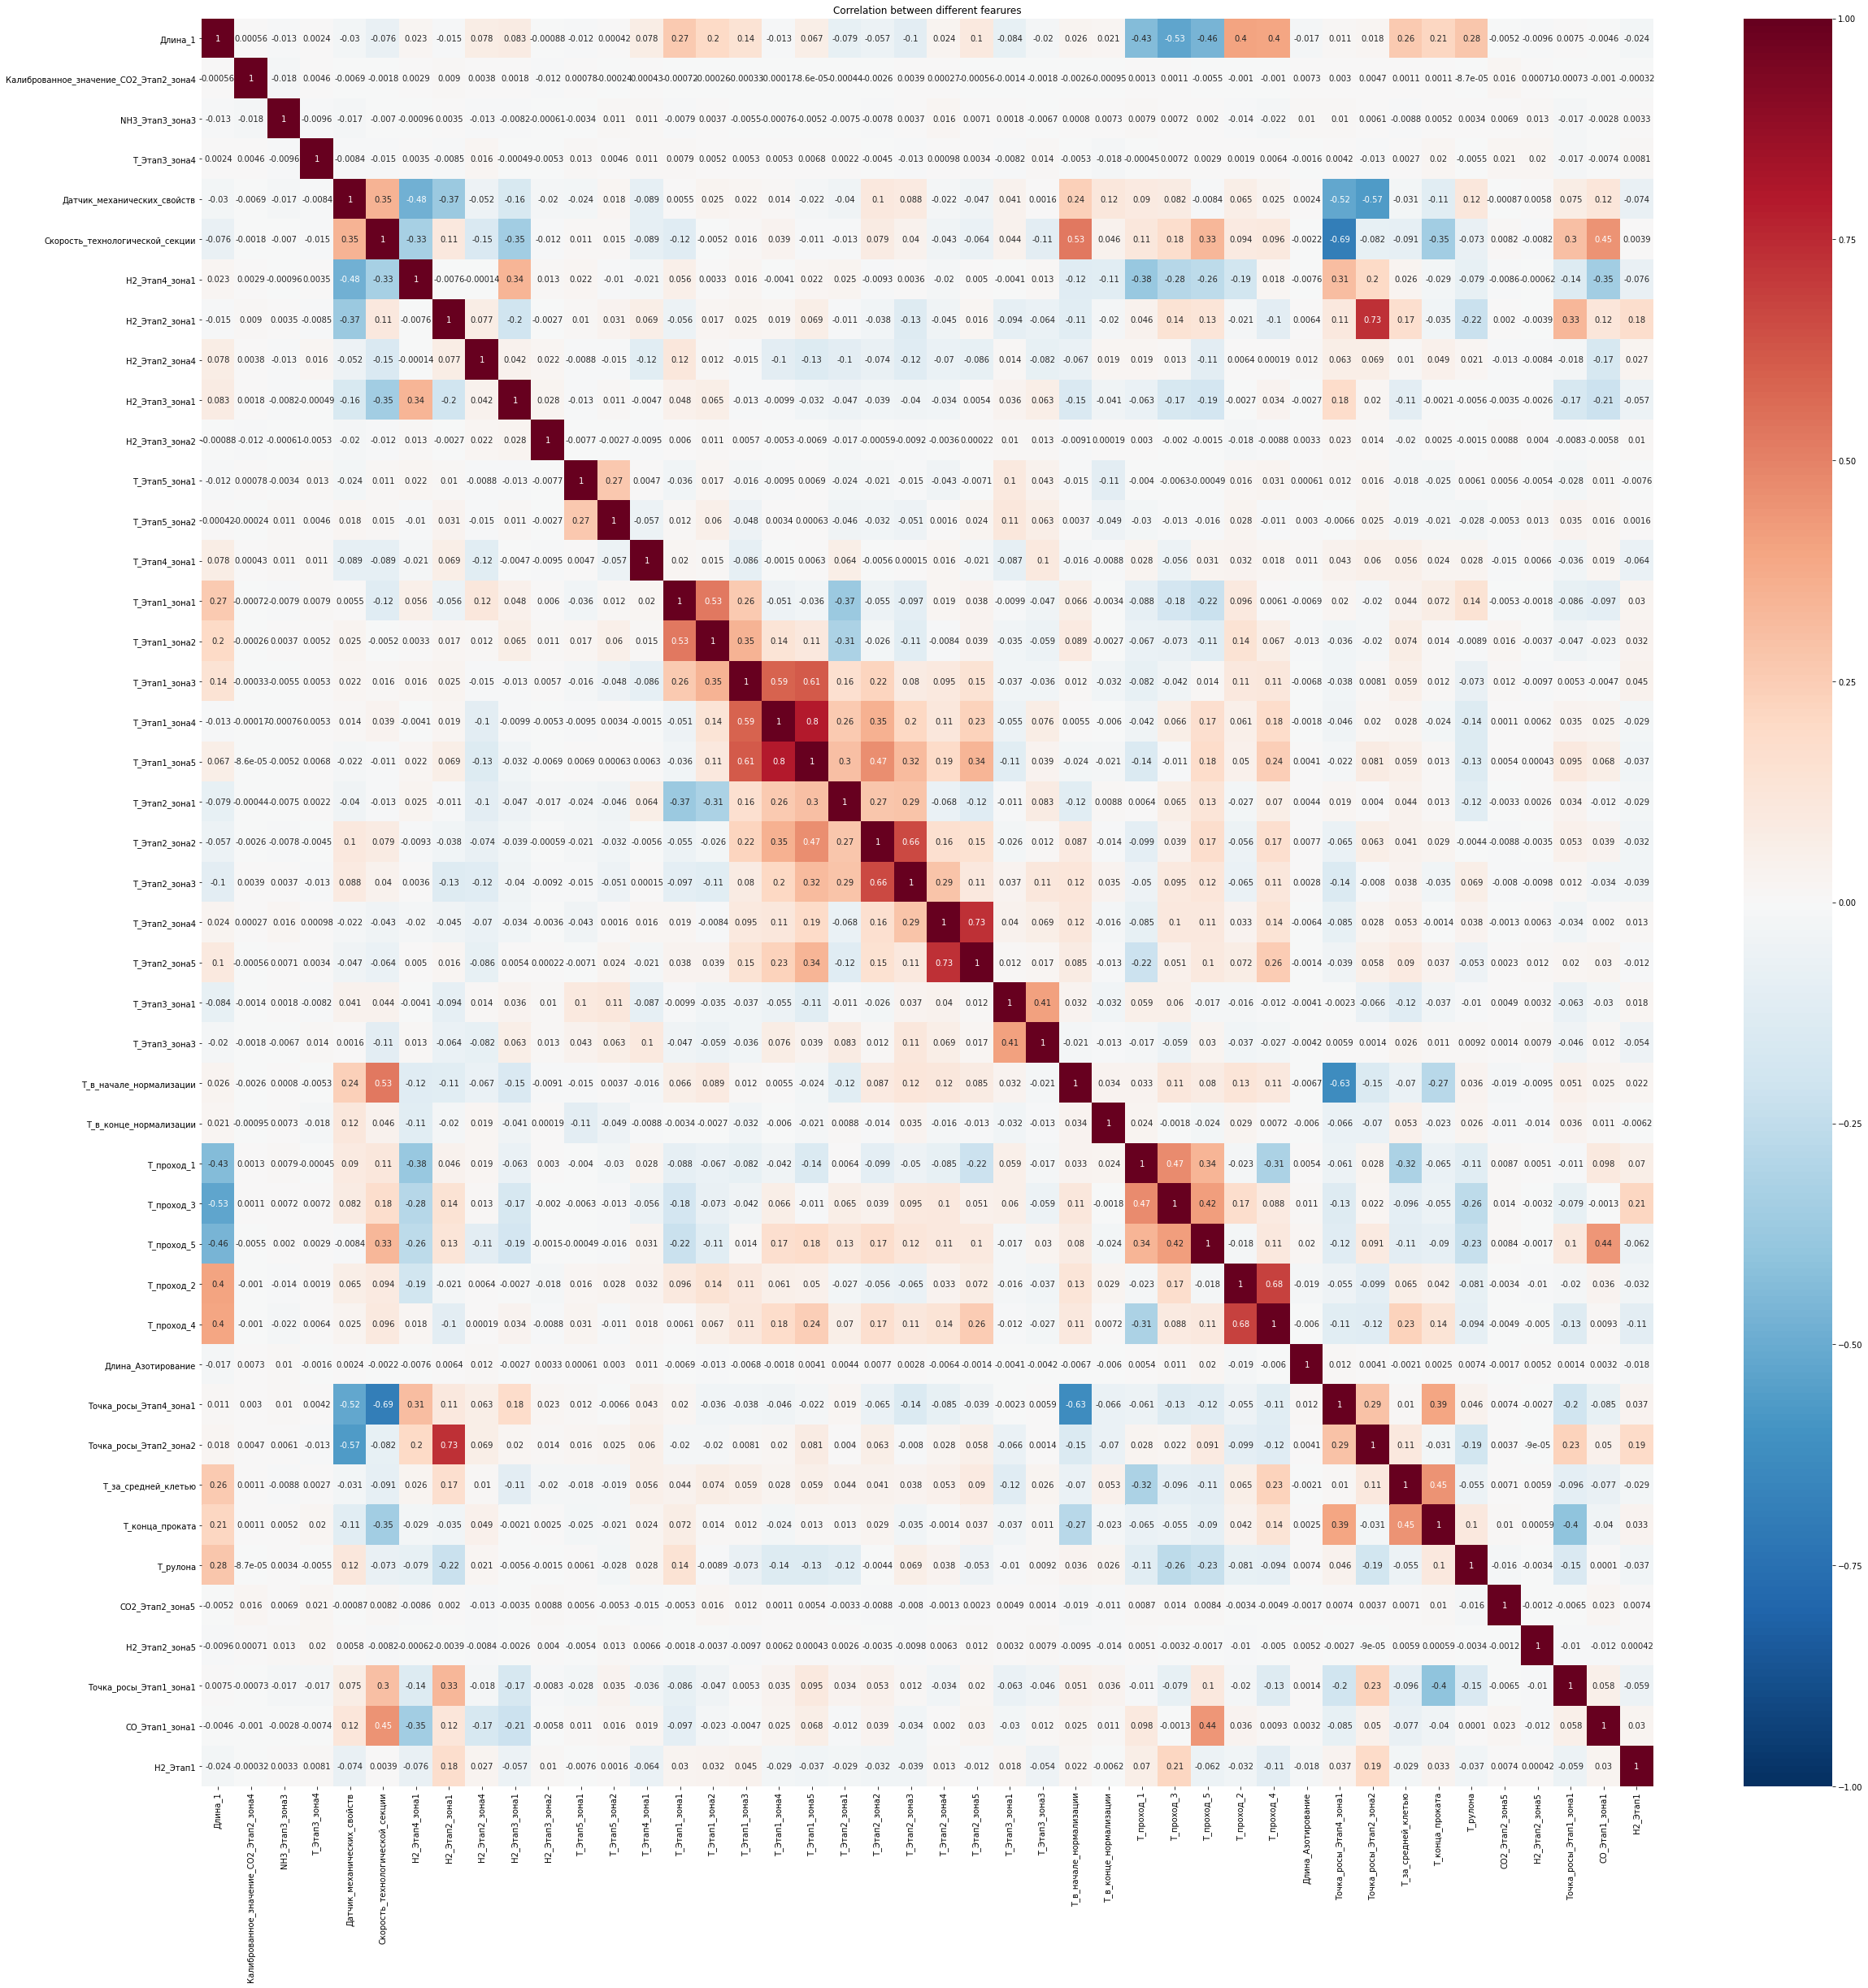

In [36]:
correlation = X_features.corr()
plt.figure(figsize=(40,40))
sns.heatmap(correlation, cmap=sns.color_palette("RdBu_r", 1000), vmin=-1, center=0, annot=True, )
plt.title('Correlation between different fearures')
plt.show()

Рассмотрим числовые признаки, которые можно использовать как категориальные

In [37]:
#признаки с уникальным количеством значений меньше 20
print('Признаки с уникальным количеством значений меньше 20:')
counter = 0
for i in X_features:
  if len(X_features[i].value_counts())<20:
    print(i,': ', len(X_features[i].value_counts()))
    counter+=1
if counter == 0: 
  print('Таких признаков нет.')
else: 
  print('Количество признаков:', counter)

Признаки с уникальным количеством значений меньше 20:
ШОС :  5
Количество признаков: 1


#Определение наиболее важных признаков

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import GenericUnivariateSelect, SelectFromModel, mutual_info_regression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedKFold, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PowerTransformer
from sklearn.metrics import mean_squared_error

# зафиксируем значение генератора случайных чисел для воспроизводимости 
SEED = 2021

##Оценка важности признаков на основе базовой модели RandomForestRegressor

Baseline модель для оценки признаков, при этом модель должна показывать важность использованных признаков. Если признаки бесполезны в простой модели, то не рекомендуется их использовать в более сложной.

In [39]:
# Функция для визуализации важности признаков
def plot_features_scores(model, data, target, column_names, model_type):
    '''Функция для визуализации важности признаков'''
    
    model.fit(data, target)
    
    if model_type == 'rf':
        (pd.DataFrame(data={'score': model['rf'].feature_importances_}, 
                      index=column_names).sort_values(by='score')
                                         .plot(kind='barh', grid=True,
                                               figsize=(6,12), legend=False));     
    else:
        raise KeyError('Unknown model_type')


In [40]:
X_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12791 entries, 0 to 12790
Data columns (total 45 columns):
 #   Column                                  Non-Null Count  Dtype   
---  ------                                  --------------  -----   
 0   Длина_1                                 12791 non-null  float64 
 1   Калиброванное_значение_CO2_Этап2_зона4  12791 non-null  float64 
 2   NH3_Этап3_зона3                         12791 non-null  float64 
 3   T_Этап3_зона4                           12791 non-null  int64   
 4   Датчик_механических_свойств             12791 non-null  float64 
 5   Скорость_технологической_секции         12791 non-null  float64 
 6   H2_Этап4_зона1                          12791 non-null  float64 
 7   H2_Этап2_зона1                          12791 non-null  float64 
 8   H2_Этап2_зона4                          12791 non-null  float64 
 9   H2_Этап3_зона1                          12791 non-null  float64 
 10  H2_Этап3_зона2                          12791 

In [41]:
rf = Pipeline([('rf', RandomForestRegressor(n_jobs=-1, random_state=SEED))])

scores = cross_val_score(estimator=rf, X=X_features, y=y, 
                         cv=5, scoring='neg_mean_squared_error', n_jobs=-1, verbose=10) #mean_absolute_error

print('scores = {} \nmean score = {:.5f} +/- {:.5f}'.format(scores, scores.mean(), scores.std()))


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   56.6s
[Parallel(n_jobs=-1)]: Done   3 out of   5 | elapsed:  1.8min remaining:  1.2min


scores = [-0.14555585 -0.156307   -0.01232729 -0.02363403 -0.20497855] 
mean score = -0.10856 +/- 0.07670


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  2.2min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  2.2min finished


In [42]:
rf

Pipeline(memory=None,
         steps=[('rf',
                 RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                       criterion='mse', max_depth=None,
                                       max_features='auto', max_leaf_nodes=None,
                                       max_samples=None,
                                       min_impurity_decrease=0.0,
                                       min_impurity_split=None,
                                       min_samples_leaf=1, min_samples_split=2,
                                       min_weight_fraction_leaf=0.0,
                                       n_estimators=100, n_jobs=-1,
                                       oob_score=False, random_state=2021,
                                       verbose=0, warm_start=False))],
         verbose=False)

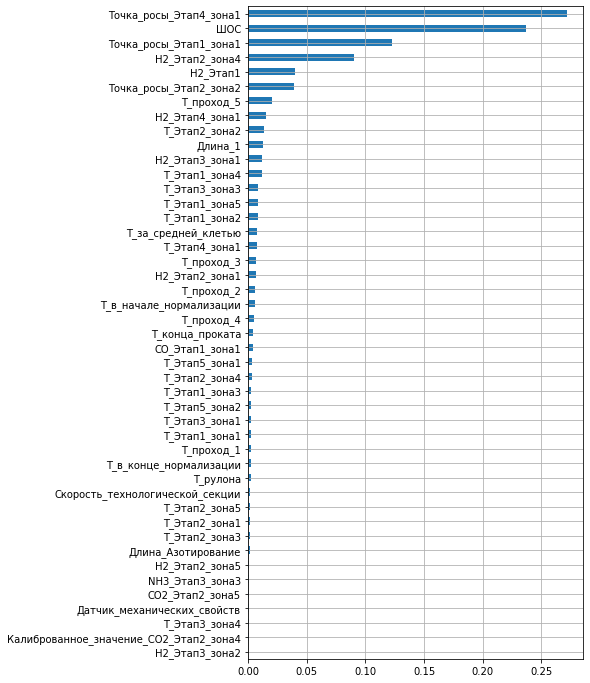

In [43]:
# график важности признаков
plot_features_scores(model=rf, data=X_features, target=y, column_names=X_features.columns, model_type='rf')

Построим таблицу важности признаков на основе базовой модели RandomForestRegressor

In [44]:
rf = RandomForestRegressor(n_jobs=-1, random_state=SEED)
rf.fit(X_features, y)

importances = pd.DataFrame(data={'Важность признака': rf.feature_importances_}, 
                      index=X_features.columns).sort_values(by='Важность признака', ascending=False)
importances.index = importances.index.rename('Название признака')
#importances

Важность признаков с учетом этапов обработки

In [45]:
importances_feature_rf	= pd.merge(importances, data_stage[['Название параметра','Этап обработки']], how='left', left_on=importances.index, right_on='Название параметра')
importances_feature_rf[['Этап обработки', 'Название параметра', 'Важность признака']]

,Этап обработки,Название параметра,Важность признака
0,Обезуглероживание,Точка_росы_Этап4_зона1,0.271682
1,Химия плавки,ШОС,0.236754
2,Обезуглероживание,Точка_росы_Этап1_зона1,0.122823
3,Обезуглероживание,H2_Этап2_зона4,0.090642
4,Обезуглероживание,H2_Этап1,0.039947
5,Обезуглероживание,Точка_росы_Этап2_зона2,0.039475
6,Холодный прокат,T_проход_5,0.020031
7,Обезуглероживание,H2_Этап4_зона1,0.015392
8,Обезуглероживание,T_Этап2_зона2,0.013502
9,Холодный прокат,Длина_1,0.013096


##Отбор признаков статистическими методами
Используется обобщённый вариант SelectKBest и SelectPercentile - GenericUnivariateSelect. SelectKBest удаляет все признаки, кроме k с наивысшей оценкой. SelectPercentile удаляет все признаки, кроме указанного пользователем их процента с самой высокой оценкой. GenericUnivariateSelect позволяет выполнять однофакторный выбор признаков с настраиваемой стратегией (позволяет выбрать лучшую стратегию отбора с помощью гиперпараметрического поискового оценщика). Однофакторный селектор признаков работает путем выбора лучших признаков на основе однофакторных статистических тестов. Непараметрические методы взаимной информации mutual_info_regression могут фиксировать любой вид статистической зависимости, они требуют большего объема выборок для точной оценки. 



In [46]:
def grid_search(model, gs_params):
    '''Функция для подбора гиперпараметров с помощью перекрёстной проверки'''
     
    gs = GridSearchCV(estimator=model, param_grid=gs_params, refit=True,
                      scoring='neg_mean_squared_error', n_jobs=-1, cv=5, verbose=10)
    gs.fit(X_features, y)
    scores = [gs.cv_results_[f'split{i}_test_score'][gs.best_index_] for i in range(5)]
    print('scores = {}, \nmean score = {:.5f} +/- {:.5f} \
           \nbest params = {}'.format(scores,
                                      gs.cv_results_['mean_test_score'][gs.best_index_],
                                      gs.cv_results_['std_test_score'][gs.best_index_],
                                      gs.best_params_))
    return gs

In [47]:
rf = Pipeline([('rf', RandomForestRegressor(n_jobs=-1, random_state=SEED))])


In [48]:
# добавим селектор в пайплайн к случайному лесу
selector_2 = ('selector_2', GenericUnivariateSelect(score_func=mutual_info_regression, mode='k_best'))
rf.steps.insert(0, selector_2)


In [49]:
# grid search
rf_params = {'selector_2__param': np.arange(5, 15),
             'rf__max_depth': np.arange(2, 14, 2),
             'rf__max_features': np.arange(0.3, 0.9, 0.1)}

In [50]:
print('Результаты grid search для rf')
rf_grid = grid_search(model=rf, gs_params=rf_params)

Результаты grid search для rf
Fitting 5 folds for each of 420 candidates, totalling 2100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   16.1s
/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:   38.6s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  4.7min
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  5.7min
[Parallel(n_jobs=-1)]: Done  57 tasks      | elapsed:  7.2min
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:  8.4min
[Parallel(n_jobs=-1)]: Done 

scores = [-0.06130096709415691, -0.16098150028922997, -0.01267367041283048, -0.020461302502230893, -0.051576025158714296], 
mean score = -0.06140 +/- 0.05303            
best params = {'rf__max_depth': 4, 'rf__max_features': 0.3, 'selector_2__param': 12}


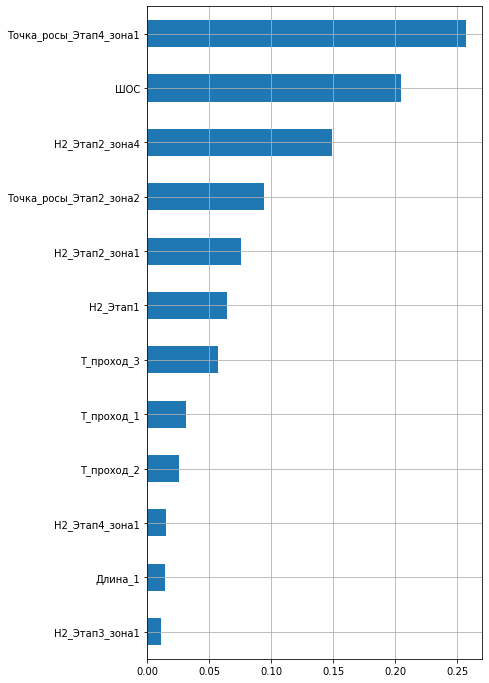

In [51]:
# выведем признаки, отобранные селектором
selected_features = [X_features.columns[i] for i, support
                     in enumerate(rf_grid.best_estimator_['selector_2'].get_support()) if support]

plot_features_scores(model=rf_grid.best_estimator_, 
                     data=X_features, target=y, column_names=selected_features, model_type='rf')

In [52]:
importances_feature_gs = pd.merge(pd.DataFrame(selected_features, columns=['Название параметра']), data_stage[['Название параметра','Этап обработки']], how='left', left_on='Название параметра', right_on='Название параметра')
importances_feature_gs

,Название параметра,Этап обработки
0,Длина_1,Холодный прокат
1,H2_Этап4_зона1,Обезуглероживание
2,H2_Этап2_зона1,Обезуглероживание
3,H2_Этап2_зона4,Обезуглероживание
4,H2_Этап3_зона1,Обезуглероживание
5,T_проход_1,Холодный прокат
6,T_проход_3,Холодный прокат
7,T_проход_2,Холодный прокат
8,ШОС,Химия плавки
9,Точка_росы_Этап4_зона1,Обезуглероживание


#Модели

##LGBM

###Оптимизация гиперпараметров Optuna

In [53]:
!pip install optuna

In [54]:
import lightgbm as lgb
from sklearn.model_selection import KFold
import optuna
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

In [55]:
train_x, test_x, train_y, test_y = train_test_split(X_features, y, test_size=0.15, random_state=SEED)


In [56]:
def objective_lgb(trial, data=train_x, target=train_y):
    '''Функция подбора гиперпараметров с помощью Optuna для модели LGBM'''
    train_x, test_x, train_y, test_y = train_test_split(data, target, test_size=0.15, random_state=SEED)
    param = {
        'tree_method':'gpu_hist',  # this parameter means using the GPU when training our model to speedup the training process
        'lambda_l2': trial.suggest_loguniform('lambda_l2', 1e-3, 1),
        'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-3, 1),
        'feature_framcion': trial.suggest_categorical('feature_framcion', [0.1, 0.2, 0.3,0.5,0.7,0.9]),
        'bagging_fraction': trial.suggest_categorical('bagging_framcion', [0.1, 0.2, 0.3, 0.4, 0.5, 0.8, 1.0]),
        'learning_rate': trial.suggest_categorical('learning_rate', [0.0008, 0.01, 0.015, 0.02, 0.03, 0.05, 0.08, 0.1]),
        'n_estimators': 4000,
        'num_leaves': trial.suggest_categorical('num_leaves', [31, 50, 150, 200, 250, 300, 350]),
        'max_depth': trial.suggest_categorical('max_depth', [5, 7, 9, 11, 13, 15, 17, 20, 23, 25]),
        'min_data_in_leaf': trial.suggest_categorical('min_data_in_leaf', [10, 20, 30]),
        'min_child_weight': trial.suggest_categorical('min_child_weight', [0.001, 0.005, 0.01, 0.05, 0.1, 0.5]),
        'random_state': SEED
    }
    model_lgb = lgb.LGBMRegressor(**param)  
    
    model_lgb.fit(train_x,train_y,eval_set=[(test_x,test_y)], early_stopping_rounds=100, verbose=False)
    
    preds = model_lgb.predict(test_x)
    
    rmse = mean_squared_error(test_y, preds, squared=False)
    
    return rmse

In [57]:
study = optuna.create_study(direction='minimize')
study.optimize(objective_lgb, n_trials=20)
print('Number of finished trials:', len(study.trials))
print('Best trial:', study.best_trial.params)

[I 2021-05-09 17:49:44,478] A new study created in memory with name: no-name-a5fb97e9-e8aa-4b5d-9374-ea16e453535f
[I 2021-05-09 17:50:12,880] Trial 0 finished with value: 0.04299642597326107 and parameters: {'lambda_l2': 0.05835764571282935, 'lambda_l1': 0.001620598775143064, 'feature_framcion': 0.9, 'bagging_framcion': 0.2, 'learning_rate': 0.015, 'num_leaves': 50, 'max_depth': 20, 'min_data_in_leaf': 20, 'min_child_weight': 0.01}. Best is trial 0 with value: 0.04299642597326107.
[I 2021-05-09 17:50:23,698] Trial 1 finished with value: 0.04324724983871738 and parameters: {'lambda_l2': 0.014258831803370321, 'lambda_l1': 0.0017627765097207627, 'feature_framcion': 0.3, 'bagging_framcion': 0.5, 'learning_rate': 0.08, 'num_leaves': 350, 'max_depth': 15, 'min_data_in_leaf': 10, 'min_child_weight': 0.001}. Best is trial 0 with value: 0.04299642597326107.
[I 2021-05-09 17:52:18,518] Trial 2 finished with value: 0.04912582425744765 and parameters: {'lambda_l2': 0.003134912530166456, 'lambda_l1

Number of finished trials: 20
Best trial: {'lambda_l2': 0.24982949571734267, 'lambda_l1': 0.08096328212611467, 'feature_framcion': 0.1, 'bagging_framcion': 1.0, 'learning_rate': 0.05, 'num_leaves': 250, 'max_depth': 11, 'min_data_in_leaf': 10, 'min_child_weight': 0.1}


In [58]:
Best_params_optuna_lgb = study.best_trial.params
Best_params_optuna_lgb

{'bagging_framcion': 1.0,
 'feature_framcion': 0.1,
 'lambda_l1': 0.08096328212611467,
 'lambda_l2': 0.24982949571734267,
 'learning_rate': 0.05,
 'max_depth': 11,
 'min_child_weight': 0.1,
 'min_data_in_leaf': 10,
 'num_leaves': 250}

In [59]:
Best_params_lgb = {
            'n_estimators': 4000,
            'random_state': SEED,
            'importance_type' : 'gain', #результат содержит суммарный выигрыш групп (сплитов), использующих этот признак
             }

In [60]:
Best_params_lgb = {**Best_params_lgb, **Best_params_optuna_lgb}
Best_params_lgb

{'bagging_framcion': 1.0,
 'feature_framcion': 0.1,
 'importance_type': 'gain',
 'lambda_l1': 0.08096328212611467,
 'lambda_l2': 0.24982949571734267,
 'learning_rate': 0.05,
 'max_depth': 11,
 'min_child_weight': 0.1,
 'min_data_in_leaf': 10,
 'n_estimators': 4000,
 'num_leaves': 250,
 'random_state': 2021}

###Определение важности признаков LGBM

In [61]:
train_x_feat_im, test_x_feat_im, train_y_feat_im, test_y_feat_im = train_test_split(train_x, train_y, test_size=0.15, random_state=SEED)
model_lgb = lgb.LGBMRegressor(**Best_params_lgb)
model_lgb.fit(train_x_feat_im, train_y_feat_im, eval_set=[(test_x_feat_im, test_y_feat_im)],
              early_stopping_rounds=100, verbose=False)

LGBMRegressor(bagging_framcion=1.0, boosting_type='gbdt', class_weight=None,
              colsample_bytree=1.0, feature_framcion=0.1,
              importance_type='gain', lambda_l1=0.08096328212611467,
              lambda_l2=0.24982949571734267, learning_rate=0.05, max_depth=11,
              min_child_samples=20, min_child_weight=0.1, min_data_in_leaf=10,
              min_split_gain=0.0, n_estimators=4000, n_jobs=-1, num_leaves=250,
              objective=None, random_state=2021, reg_alpha=0.0, reg_lambda=0.0,
              silent=True, subsample=1.0, subsample_for_bin=200000,
              subsample_freq=0)

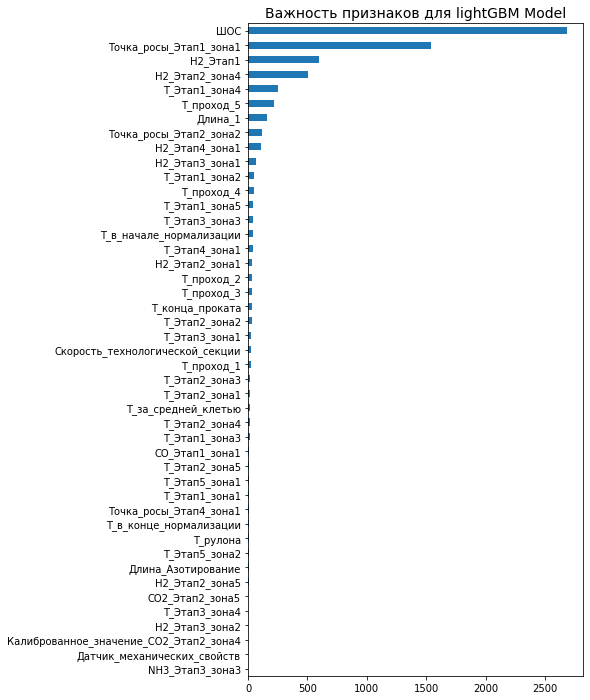

In [62]:
importances_lgbm = pd.Series(model_lgb.feature_importances_, index = train_x_feat_im.columns)
importances_lgbm = importances_lgbm.sort_values()
importances_lgbm.plot(kind = "barh", figsize=(6, 12))
plt.title("Важность признаков для lightGBM Model", fontsize=14)
plt.show()

In [63]:
importances_lgbm = pd.DataFrame(importances_lgbm, columns=['Важность признака']).sort_values(by='Важность признака', ascending=False)
importances_lgbm = pd.merge(importances_lgbm, data_stage[['Название параметра','Этап обработки']], how='left', left_on=importances_lgbm.index, right_on='Название параметра')
importances_lgbm[['Этап обработки', 'Название параметра', 'Важность признака']]

,Этап обработки,Название параметра,Важность признака
0,Химия плавки,ШОС,2684.822637
1,Обезуглероживание,Точка_росы_Этап1_зона1,1542.671105
2,Обезуглероживание,H2_Этап1,594.452728
3,Обезуглероживание,H2_Этап2_зона4,501.729490
4,Обезуглероживание,T_Этап1_зона4,253.392100
5,Холодный прокат,T_проход_5,214.149844
6,Холодный прокат,Длина_1,158.464543
7,Обезуглероживание,Точка_росы_Этап2_зона2,117.357527
8,Обезуглероживание,H2_Этап4_зона1,110.059666
9,Обезуглероживание,H2_Этап3_зона1,64.550982


Использование Permutation feature importance для оценки важности признаков LGBM

In [64]:
from sklearn.inspection import permutation_importance

model_lgb.fit(train_x_feat_im, train_y_feat_im)

r = permutation_importance(model_lgb, test_x_feat_im, test_y_feat_im, n_repeats=30, random_state=SEED)

In [65]:
permut_imp = {}
for i in r.importances_mean.argsort()[::-1]:
  if r.importances_mean[i] - 2 * r.importances_std[i] > 0:
    permut_imp[test_x_feat_im.columns[i]] = round(r.importances_mean[i], 6)
    

In [66]:
permut_imp_lgbm = pd.DataFrame.from_dict(permut_imp, orient='index').reset_index()
permut_imp_lgbm.columns = ['Название параметра', 'Важность признака']
permut_imp_lgbm

,Название параметра,Важность признака
0,ШОС,1.414119
1,Точка_росы_Этап1_зона1,0.501637
2,H2_Этап1,0.231933
3,H2_Этап2_зона4,0.142617
4,T_Этап1_зона4,0.073545
5,T_проход_5,0.054709
6,H2_Этап4_зона1,0.045109
7,Длина_1,0.031996
8,Точка_росы_Этап2_зона2,0.025998
9,T_Этап1_зона2,0.015822


###Обучение и тестирование модели

In [67]:
def modeling_lgb(train = train_x, test = test_x, target = train_y, n_splits=10):
  '''Функция для обучения модели LGBM с помощью перекрёстной проверки'''
  #train on 10 folds cross validation
  preds = np.zeros(test.shape[0])
  #creating 10 folds
  kf = KFold(n_splits, random_state=48, shuffle=True)
  rmse=[]
  n=0
  for trn_idx, test_idx in kf.split(train, target):
      #separating training and validation data from training columns
      X_tr, X_val = train.iloc[trn_idx], train.iloc[test_idx]
      #separating training and validation data from target values
      y_tr, y_val = target.iloc[trn_idx], target.iloc[test_idx]
      
      #regressor with optimized parameters 
      model_lgbm = lgb.LGBMRegressor(**Best_params_lgb)
      model_lgbm.fit(X_tr, y_tr, eval_set=[(X_val,y_val)], early_stopping_rounds=100, verbose=False)
      
      #predicting on test data provided in separate file(actual test data not validation)
      preds += model_lgbm.predict(test) / kf.n_splits
      rmse.append(mean_squared_error(y_val, model_lgbm.predict(X_val), squared=False))
      print(n+1, rmse[n])
      n+=1
  print(f"mean RMSE for all the folds is {np.mean(rmse)}")
  return model_lgbm

In [68]:
model_lgbm = modeling_lgb(train_x, test_x, train_y, 10)

1 0.06403898518903052
2 0.04365937109062895
3 0.03889279706134778
4 0.03760314578287106
5 0.039535990203955276
6 0.03220239546698399
7 0.04274854969435599
8 0.04157179490033004
9 0.026392703731825593
10 0.04577307803963153
mean RMSE for all the folds is 0.04124188111609608


In [69]:
pred_test_LGBM = model_lgbm.predict(test_x)
print(f'RMSE: ',mean_squared_error(test_y, pred_test_LGBM, squared=False))

RMSE:  0.02905058695774585


In [70]:
#таблица важности признаков моделями rf и lgbm
importances_merg = pd.merge(importances_lgbm[['Название параметра', 'Важность признака']], importances_feature_rf, how='left', left_on='Название параметра', right_on='Название параметра', suffixes=('_lgbm', '_rf')).merge(permut_imp_lgbm, how='left', left_on='Название параметра', right_on='Название параметра')
importances_merg.rename(columns = {'Важность признака':'Важность признака lgbm permutation_importance'}, inplace = True)

#Выводы

1.	Описание обнаруженных проблем с исходными данными и способов их преодоления.

1.1. Следующие признаки содержат пропуски:

- Поступление в технологическую секцию - 4813

- Выезд из технологической секции - 3306

- Начало непрерывного отжига	- 7978

- Окончание непрерывного отжига	- 9485

- Точка росы Этап1 зона1 - 7120

- Точка росы Этап1 зона2 -	5671

- CO Этап1 зона1 -	11476

- CO Этап1 зона2 -	1315

Первые четыре временных признака в работе не использовались, при необходимости их можно заполнить по начальному и конечному времени каждого этапа обработки.
Следующие три признака содержат большое число пропусков, необходимо уточнить ошибки на этапе сбора и выгрузки данных.
Последний признак можно заполнить по среднему значению или сильно отличающимся значением (хорошо подходит для моделей, основанных на деревьях решений, т.к. позволяет сделать разделение на пропущенные и непропущенные значения).

1.2. Данные содержат постоянные и квазипостоянные признаки:

- Количество постоянных признаков: 4

- Количество квазипостоянных признаков с порогом дисперсии 0.01: 25

Эти данные были отфильтрованы.

1.3. Коррелированные признаки

- Количество признаков со значением корреляции больше 0,8: 22

Можно провести анализ с более высоким порогом и определить как это скажется на точности моделей.

2.	Таблица с ключевыми признаками, на которых достигается максимальное качество модели:

При анализе важности признаков использовались отбор с использованием моделей и один из статистических подходов. Можно также использовать самый надежный, но и самый вычислительно сложный способ основаный на переборе признаков: обучаем модель на подмножестве признаков, запоминаем результат, повторяем для разных подмножеств, сравниваем качество моделей - подход Exhaustive Feature Selection.

In [71]:
importances_merg[['Этап обработки', 'Название параметра', 'Важность признака_lgbm', 'Важность признака lgbm permutation_importance','Важность признака_rf']]

,Этап обработки,Название параметра,Важность признака_lgbm,Важность признака lgbm permutation_importance,Важность признака_rf
0,Химия плавки,ШОС,2684.822637,1.414119,0.236754
1,Обезуглероживание,Точка_росы_Этап1_зона1,1542.671105,0.501637,0.122823
2,Обезуглероживание,H2_Этап1,594.452728,0.231933,0.039947
3,Обезуглероживание,H2_Этап2_зона4,501.729490,0.142617,0.090642
4,Обезуглероживание,T_Этап1_зона4,253.392100,0.073545,0.011793
5,Холодный прокат,T_проход_5,214.149844,0.054709,0.020031
6,Холодный прокат,Длина_1,158.464543,0.031996,0.013096
7,Обезуглероживание,Точка_росы_Этап2_зона2,117.357527,0.025998,0.039475
8,Обезуглероживание,H2_Этап4_зона1,110.059666,0.045109,0.015392
9,Обезуглероживание,H2_Этап3_зона1,64.550982,0.015581,0.012265


Согласно полученным результатам наиболее важными этапами в технологическом цикле влияющими на параметр удельные магнитные потери являются этапы обезуглероживания и холодный прокат. Важным параметров также является ШОС (ГРАНУЛИРОВАННЫЕ ШЛАКООБРАЗУЮЩИЕ СМЕСИ) из этапа химия плавки.


3.	Пристрелочные модели на основе отобранных признаков с оценкой их точности.

Использовались модели RandomForestRegressor в базовом варианте и с GridSearchCV, а также LGBMRegressor с настройками гиперпараметров с помощью Optuna. 